In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [4]:
circuits = pd.read_csv(r'dataset files\circuits.csv')
constructor_results = pd.read_csv(r'dataset files\constructor_results.csv')
constructor_standings = pd.read_csv(r'dataset files\constructor_standings.csv')
constructors = pd.read_csv(r'dataset files\constructors.csv')
driver_standings = pd.read_csv(r'dataset files\driver_standings.csv')
drivers = pd.read_csv(r'dataset files\drivers.csv')
lap_times = pd.read_csv(r'dataset files\lap_times.csv')
pit_stops = pd.read_csv(r'dataset files\pit_stops.csv')
qualifying = pd.read_csv(r'dataset files\qualifying.csv')
races = pd.read_csv(r'dataset files\races.csv')
results = pd.read_csv(r'dataset files\results.csv')
seasons = pd.read_csv(r'dataset files\seasons.csv')
sprint_results = pd.read_csv(r'dataset files\sprint_results.csv')
status = pd.read_csv(r'dataset files\status.csv')

#### Data Cleaning

In [5]:
circuits.drop('url', axis=1, inplace= True)
constructors.drop('url', axis=1, inplace= True)
drivers.drop('url', axis=1, inplace= True)
seasons.drop('url', axis=1, inplace= True)
constructor_standings.drop('positionText', axis=1, inplace= True)
races.drop(columns= ['url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date',\
                     'fp3_time','quali_date','quali_time','sprint_date','sprint_time'], axis=1, inplace=True)

In [6]:
qualifying['q2'] = qualifying['q2'].fillna('NA')
qualifying['q3'] = qualifying['q3'].fillna('NA')

In [7]:
#changing datatype for dob column in drivers and date column in races
drivers['dob']= pd.to_datetime(drivers['dob'])
races['date'] = pd.to_datetime(races['date'])

In [8]:
drivers['Name'] = drivers['forename'] +" "+ drivers['surname']

In [9]:
drivers.drop(columns= ['forename', 'surname'], axis=1, inplace= True)

In [10]:
results = results[results['fastestLapTime'].notnull()]
results['fastestLapTime'] = results['fastestLapTime'].fillna(0)

In [11]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [12]:
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [13]:
def time_to_milliseconds(time_str):
    # Handle invalid or missing values
    if time_str == '\\N' or not time_str:
        return None  # or return 0 depending on how you want to handle missing data

    # Split the time string by ':'
    time_parts = time_str.split(':')

    # Handle cases where there are 2 parts (minutes and seconds) or 1 part (seconds only)
    if len(time_parts) == 2:
        minutes, seconds = time_parts
        milliseconds = 0
    elif len(time_parts) == 1:
        minutes = 0
        seconds = time_parts[0]
        milliseconds = 0
    else:
        minutes, seconds, milliseconds = time_parts
    
    # If seconds have a decimal, split seconds into whole and fractional parts
    if '.' in seconds:
        seconds, milliseconds = seconds.split('.')
        milliseconds = milliseconds.ljust(3, '0')  # Ensure milliseconds are 3 digits
    
    # Convert everything to integer values
    try:
        minutes = int(minutes)
        seconds = int(seconds)
        milliseconds = int(milliseconds)
    except ValueError:
        return None  # In case the value cannot be converted to an integer, return None or handle the error

    # Convert the time to milliseconds
    return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
results['fastestLap_time_ms'] = results['fastestLapTime'].apply(time_to_milliseconds)

In [14]:
display(circuits.head())
display(constructor_results.head())
display(constructor_standings.head())
display(constructors.head())
display(driver_standings.head())
display(drivers.head())
display(lap_times.head())
display(pit_stops.head())
display(qualifying.head())
display(races.head())
display(results.head())
display(seasons.head())
display(sprint_results.head())
display(status.head())

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0


,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


,driverId,driverRef,number,code,dob,nationality,Name
0,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,fastestLap_time_ms
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,87452.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,87739.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,88090.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,88603.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,87418.0


,year
0,2009
1,2008
2,2007
3,2006
4,2005


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [15]:
from sqlalchemy import MetaData, create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy import text

In [16]:
metadata =MetaData()

In [17]:
# Define the SQLite database
engine = create_engine('sqlite:///f1_data.db')
Base = declarative_base()

In [18]:
# pushing dataframe into sql tables
circuits.to_sql('circuits', engine, index= False, if_exists= 'replace')
drivers.to_sql('drivers', engine, index= False, if_exists= 'replace')
driver_standings.to_sql('driver_standings', engine, index= False, if_exists= 'replace')
constructor_results.to_sql('constructor_results', engine, index= False, if_exists= 'replace')
constructor_standings.to_sql('constructor_standings', engine, index= False, if_exists= 'replace')
constructors.to_sql('constructors', engine, index= False, if_exists= 'replace')
races.to_sql('races', engine, index= False, if_exists= 'replace')
lap_times.to_sql('lap_times', engine, index= False, if_exists= 'replace')
pit_stops.to_sql('pit_stops', engine, index= False, if_exists= 'replace')
qualifying.to_sql('qualifying', engine, index = False, if_exists= 'replace')
status.to_sql('status', engine, index = False, if_exists= 'replace')
results.to_sql('results', engine, index = False, if_exists= 'replace')
sprint_results.to_sql('sprint_results', engine, index = False, if_exists= 'replace')
seasons.to_sql('seasons', engine, index = False, if_exists= 'replace')

75

#### **Circuits Distribution and Occurence**

In [19]:
#renaming column in races table
with engine.connect() as connection:
    connection.execute(text("""ALTER TABLE races
                               RENAME COLUMN name TO Grand_Prix
                            """))

In [20]:
#query to find distinct circuits name and grand prix name and returing it into Circuit_df dataframe.
query = """
        SELECT DISTINCT circuits.name, circuits.country, 
        FIRST_VALUE(races.Grand_Prix) OVER (PARTITION BY circuits.circuitId ORDER BY races.year) AS grand_prix, 
        circuits.lat, circuits.lng, COUNT(races.year) as occurence
        FROM circuits
        JOIN races ON circuits.circuitId = races.circuitId
        GROUP BY circuits.name, circuits.country
        """
Circuit_df = pd.read_sql(query, engine)

In [21]:
Circuit_df.sort_values(by= 'occurence', ascending= False, inplace= True)
Circuit_df

,name,country,grand_prix,lat,lng,occurence
13,Autodromo Nazionale di Monza,Italy,Italian Grand Prix,45.6156,9.28111,74
5,Circuit de Monaco,Monaco,Monaco Grand Prix,43.7347,7.42056,70
8,Silverstone Circuit,UK,British Grand Prix,52.0786,-1.01694,59
12,Circuit de Spa-Francorchamps,Belgium,Belgian Grand Prix,50.4372,5.97139,57
6,Circuit Gilles Villeneuve,Canada,Canadian Grand Prix,45.5000,-73.52280,43
...,...,...,...,...,...,...
55,Zeltweg,Austria,Austrian Grand Prix,47.2039,14.74780,1
62,Ain Diab,Morocco,Moroccan Grand Prix,33.5786,-7.68750,1
61,Sebring International Raceway,USA,United States Grand Prix,27.4547,-81.34830,1
63,Pescara Circuit,Italy,Pescara Grand Prix,42.4750,14.15080,1


In [22]:
fig = px.scatter_geo(data_frame= Circuit_df, lat= 'lat', lon= 'lng', hover_name= 'name',
                     hover_data= {'occurence': True, 'grand_prix': True},
                     projection= 'natural earth',
                     color= 'country')
fig.update_traces(marker = dict(line= dict(width= 0.5, color= 'black')),
                  hovertemplate= "<b>%{hovertext}<b><br>"+
                                 "<b>%{customdata[1]}<b><br>"+
                                 "occurence:  %{customdata[0]:,.0f}<br>"
                    )
fig.show()

#### **Driver Performance**

In [23]:
#driver performance 
query = """
        SELECT drivers.Name, COUNT(results.position) AS wins
        FROM drivers
        JOIN results ON drivers.driverId = results.driverId
        WHERE results.position = 1
        GROUP BY drivers.driverId
        ORDER BY wins DESC
        """
driver_performance = pd.read_sql(query, engine)
driver_performance

,Name,wins
0,Lewis Hamilton,104
1,Michael Schumacher,91
2,Max Verstappen,61
3,Sebastian Vettel,53
4,Alain Prost,51
...,...,...
109,Jean Alesi,1
110,Olivier Panis,1
111,Jarno Trulli,1
112,Robert Kubica,1


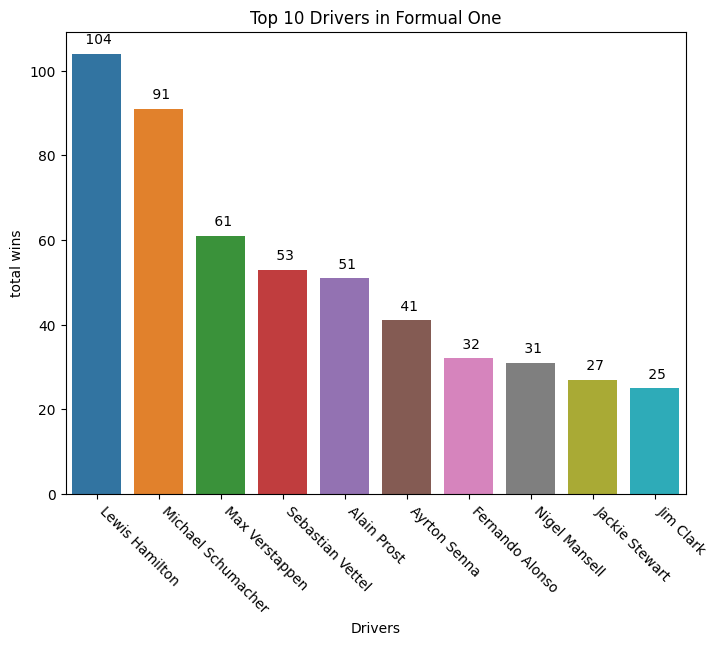

In [24]:
plt.figure(figsize= (8,6))
ax = sns.barplot(data= driver_performance.head(10), x= 'Name',y= 'wins', hue= 'Name')
plt.title('Top 10 Drivers in Formual One')
plt.ylabel('total wins')
plt.xlabel('Drivers')
plt.xticks(rotation = -45, ha= 'left',va= 'top')
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                xytext=(0, 5),  # Offset to move text 5 points above the bar
                textcoords='offset points')
plt.show()

#### **Constructor Performance**

In [169]:
query = """
        SELECT constructors.name, COUNT(constructor_standings.position) as wins 
        FROM constructors
        JOIN constructor_standings ON constructors.constructorId = constructor_standings.constructorId
        JOIN races ON races.raceId = constructor_standings.raceId
        WHERE (constructor_standings.position) = 1
        GROUP BY constructors.constructorId
        ORDER BY wins DESC
"""
constructor_performance = pd.read_sql(query, engine)
constructor_performance.head()

,name,wins
0,Ferrari,234
1,McLaren,165
2,Mercedes,145
3,Red Bull,120
4,Williams,114


In [179]:
query= """
SELECT year, name 
FROM constructor_standings AS cs
JOIN(
SELECT year, raceId 
FROM races
GROUP BY year
HAVING MAX(round)
)AS max_race
ON max_race.raceId = cs.raceId
JOIN constructors AS c
ON c.constructorId = cs.constructorId
WHERE position = 1
ORDER BY year DESC
"""
res = pd.read_sql(query, engine)
res.head()

,year,name
0,2023,Red Bull
1,2022,Red Bull
2,2021,Mercedes
3,2020,Mercedes
4,2019,Mercedes


In [180]:
Constructor_champions = res.groupby(by= 'name').size().reset_index(name = 'Constructor Wins')

In [189]:
Constructor_champions.sort_values('Constructor Wins', ascending= False, inplace= True)
Constructor_champions.reset_index(drop=True, inplace= True)
Constructor_champions.head()

,name,Constructor Wins
0,Ferrari,16
1,Williams,9
2,McLaren,8
3,Mercedes,8
4,Red Bull,6


In [190]:
fig = px.bar(data_frame=Constructor_champions, 
                   x='name', 
                   y='Constructor Wins', 
                   title='Constructor Champions', 
                   color='name', 
                   hover_name='name', 
                   hover_data={'name': True, 'Constructor Wins': True})  # Proper hover data

# Update layout for axis titles and remove legend
fig.update_layout(
    xaxis_title='Constructors', 
    yaxis_title='Total Constructor Wins', 
    showlegend=False,
    title={'text': 'Constructor Champions', 'x': 0.5, 'yanchor': 'top', 'xanchor': 'center'}
)

# Update hover template to customize hover text
fig.update_traces(
    hovertemplate= 
                  "<b>Constructor Name: %{x}</b><br>" +  # Display the constructor name
                  "<b>Constructor Wins: %{y}</b><br>"  # Display the 'Constructor Wins'
)
fig.show()

#### fastest lap times


In [31]:
# #changing data types for results column
# l = ['time', 'milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed']
# for i in l:
#     results[i] = pd.to_numeric(results[i], errors='coerce')

In [32]:
# l = ['time','milliseconds','fastestLap','fastestLapTime','position']
# for i in l:
#     sprint_results[i] = pd.to_numeric(sprint_results[i], errors= 'coerce')

In [ ]:
# query = """
# WITH fastest_lap AS (
#     SELECT 
#         r.driverId, 
#         d.Name, 
#         r.raceId, 
#         r.fastestLap_time_ms
#     FROM results r
#     JOIN drivers d
#         ON r.driverId = d.driverId
#     WHERE r.statusId = 1 OR r.statusId != 62
#         AND r.fastestLap_time_ms = (
#             SELECT MIN(r2.fastestLap_time_ms)
#             FROM results r2
#             WHERE r2.raceId = r.raceId
#               AND r2.statusId = 1
#               OR r2.statusId != 62
#         )
# ),
# fastest_lap_count AS (
#     SELECT
#         driverId, 
#         Name, 
#         COUNT(driverId) AS Number_of_fastestLap
#     FROM fastest_lap
#     GROUP BY driverId, Name
# )
# SELECT
#     flc.driverId, 
#     flc.Name, 
#     flc.Number_of_fastestLap
# FROM fastest_lap_count flc
# ORDER BY flc.Number_of_fastestLap DESC;

# """
# Fastest_lap = pd.read_sql(query, engine)

In [ ]:
# Fastest_lap.sort_values('Number_of_fastestLap', ascending= False, inplace=True)

#### Driver Performance analysis


In [59]:
query = """
SELECT *
FROM drivers as d
JOIN driver_standings as ds
ON d.driverId = ds.driverId
JOIN races as r
ON r.raceId = ds.raceId
"""
driver_df = pd.read_sql(query, engine)

In [43]:
lewis_performance = driver_df[(driver_df['Name']=='Lewis Hamilton') & (driver_df['year']>=2007) & (driver_df['year']<=2024)].copy()

In [48]:
lewis_performance.head()

,driverId,driverRef,number,code,dob,nationality,Name,driverStandingsId,raceId,driverId,...,position,positionText,wins,raceId,year,round,circuitId,Grand_Prix,date,time
0,1,hamilton,44,HAM,1985-01-07 00:00:00.000000,British,Lewis Hamilton,1,18,1,...,1,1,1,18,2008,1,1,Australian Grand Prix,2008-03-16 00:00:00.000000,04:30:00
1,1,hamilton,44,HAM,1985-01-07 00:00:00.000000,British,Lewis Hamilton,9,19,1,...,1,1,1,19,2008,2,2,Malaysian Grand Prix,2008-03-23 00:00:00.000000,07:00:00
2,1,hamilton,44,HAM,1985-01-07 00:00:00.000000,British,Lewis Hamilton,27,20,1,...,3,3,1,20,2008,3,3,Bahrain Grand Prix,2008-04-06 00:00:00.000000,11:30:00
3,1,hamilton,44,HAM,1985-01-07 00:00:00.000000,British,Lewis Hamilton,48,21,1,...,2,2,1,21,2008,4,4,Spanish Grand Prix,2008-04-27 00:00:00.000000,12:00:00
4,1,hamilton,44,HAM,1985-01-07 00:00:00.000000,British,Lewis Hamilton,69,22,1,...,3,3,1,22,2008,5,5,Turkish Grand Prix,2008-05-11 00:00:00.000000,12:00:00


In [50]:
lewis_performance.replace([np.inf, -np.inf], np.nan, inplace= True)

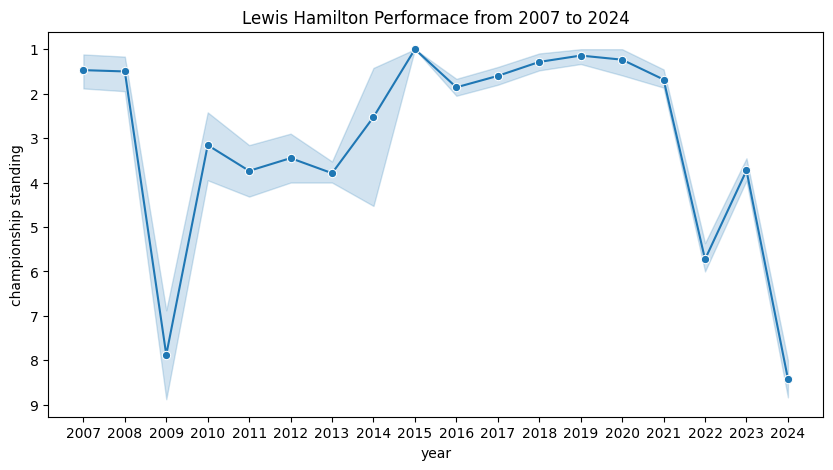

In [117]:
#lineplot
plt.figure(figsize= (10,5))
sns.lineplot(lewis_performance, x= 'year', y= 'position', marker= 'o')
plt.title('Lewis Hamilton Performace from 2007 to 2024')
plt.xticks(lewis_performance['year'].unique())
plt.gca().invert_yaxis()
plt.xlabel('year')
plt.ylabel('championship standing')
plt.show()

In [ ]:
schumacher_performance = driver_df[(driver_df['Name']== 'Michael Schumacher')].copy()

In [60]:
schumacher_performance.sort_values('year', ascending=True, inplace= True)

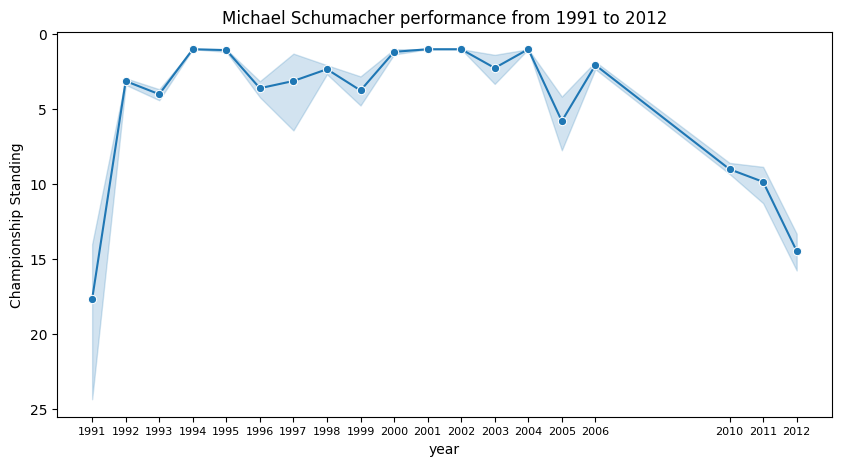

In [118]:
plt.figure(figsize= (10,5))
sns.lineplot(data= schumacher_performance, x= 'year', y= 'position', marker='o')
plt.title("Michael Schumacher performance from 1991 to 2012")
plt.xlabel('year')
plt.ylabel('Championship Standing')
plt.yticks()
plt.gca().invert_yaxis()
plt.xticks(schumacher_performance['year'].unique(), fontsize = 8)
plt.show()

#### Constructor Performance


In [72]:
query = """
SELECT *
FROM constructors as c
JOIN constructor_standings as cs
ON c.constructorId = cs.constructorId
JOIN races as r
ON r.raceId = cs.raceId
"""
constructor_df = pd.read_sql(query, engine)

In [74]:
mercedes_performance = constructor_df[(constructor_df['name']== 'Mercedes') & (constructor_df['year'] >=2014) & (constructor_df['year'] <=2024)]

In [76]:
ferrari_performance = constructor_df[(constructor_df['name']== 'Ferrari') & (constructor_df['year'] >=1996) & (constructor_df['year'] <=2006)]

In [77]:
#comparison of constructor
mercedes_ferrari_df = pd.concat([mercedes_performance, ferrari_performance])

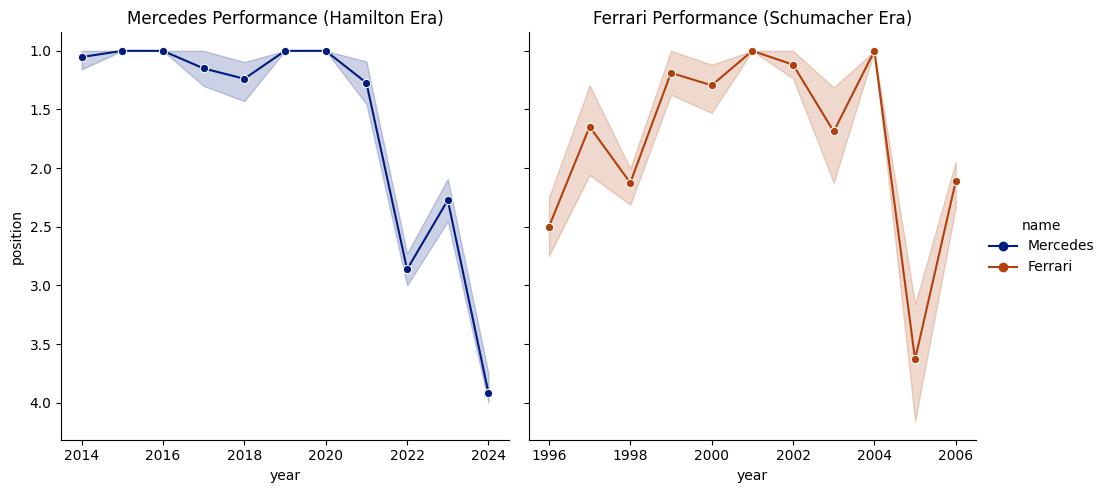

In [114]:
g = sns.relplot(data= mercedes_ferrari_df, x = 'year', y= 'position', col= 'name', kind= 'line', facet_kws= {'sharex': False}, height= 5, aspect=1, marker='o',\
                hue= 'name', palette= 'dark')
plt.gca().invert_yaxis()
titles = ["Mercedes Performance (Hamilton Era)", "Ferrari Performance (Schumacher Era)"]
for ax,title in zip(g.axes.flatten(), titles):
    ax.set_title(title)

